In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true):
    xold = x0
    k=0
    conditions = True
    
    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    errA_values = []  # Store ||grad_f(x_k)||_2 values
    errR_values = []  # Store ||xk-xtrue||_2 values
    
    while conditions:
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        errA_values.append(np.linalg.norm(grad_f(x), 2))
        errR_values.append(np.linalg.norm(x - x_true, 2))
        
        condition1 = np.linalg.norm(grad_f(x)) > tolf*np.linalg.norm(grad_f(x0))
        condition2 =  np.linalg.norm(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 & condition2 & condition3
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, errA_values, errR_values

def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            break
    return alpha
    
def GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true):
    xold = x0
    k = 0
    conditions = True

    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    errA_values = []  # Store ||grad_f(x_k)||_2 values
    errR_values = []  # Store ||xk-xtrue||_2 values
    
    while conditions:
        alpha = backtracking(f, grad_f, xold)
        x = xold - alpha * grad_f(xold)
        
        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        errA_values.append(np.linalg.norm(grad_f(x), 2))
        errR_values.append(np.linalg.norm(x - x_true, 2))
        
        condition1 = np.linalg.norm(grad_f(x), 2) > tolf * np.linalg.norm(grad_f(x0), 2)
        condition2 = np.linalg.norm(x-xold, 2) > tolx
        condition3 = k < kmax
        conditions = condition1 and condition2 and condition3
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, errA_values, errR_values

In [3]:
def plt_contour(xk_vals, k, f_vals, grad_valks, err_vals, f, title):
    xv = np.linspace(-10, 10, 100).T
    yv = np.linspace(-10, 10, 100).T

    xx,yy = np.meshgrid(xv, yv)
    
    zz = f([xx, yy])

    xk_vals = np.array(xk_vals)
    
    plt.plot(xk_vals[:,0], xk_vals[:,1], '--go')

    plt.contour(xx, yy, zz)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()

Alpha: 0.1, Iteration: 51, Solution: [2.99996575 0.99998858], Error: 1.1417981541728127e-05
Alpha: 0.01, Iteration: 435, Solution: [2.99954242 0.99984747], Error: 0.00015252566467556237
Alpha: 0.001, Iteration: 1001, Solution: [2.59561682 0.86520561], Error: 0.13479439340178992


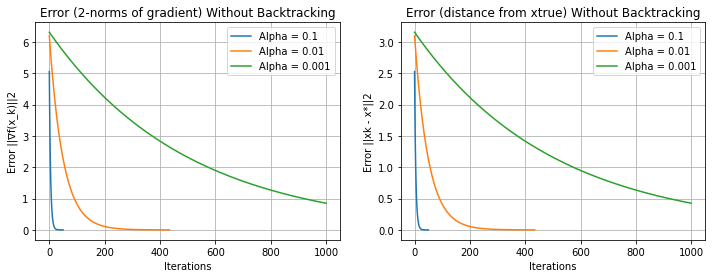


Iteration: 81, Solution: [2.99993978 0.99997993], Error: 2.007484934863912e-05


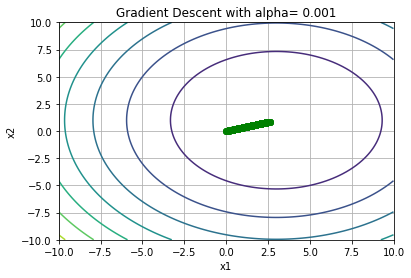

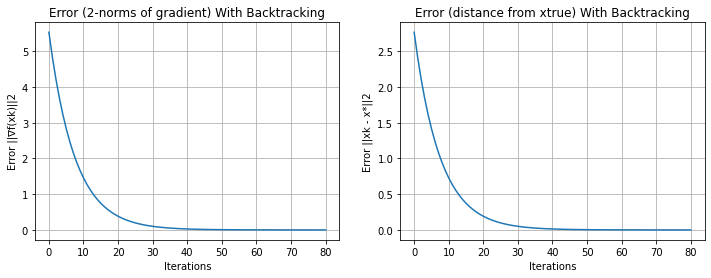

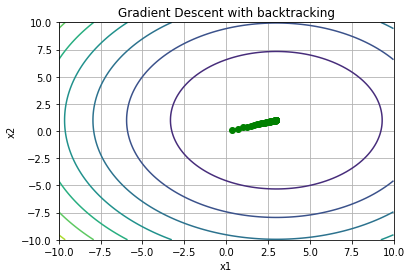

In [4]:
#FUNCTION 1
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1-3)**2 + (x2-1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1-3), 2*(x2-1)])

x0 = np.array([0, 0])
kmax = 1000 #try 100 and 1000
tolf = tolx = 1e-5
x_true = np.array([3, 1])

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with alpha= " + str(alpha))

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with backtracking")

Alpha: 0.1, Iteration: 1001, Solution: [2. 2.], Error: 0.4472135954999579
Alpha: 0.01, Iteration: 412, Solution: [1.         1.99951452], Error: 0.00021711417505296328
Alpha: 0.001, Iteration: 1001, Solution: [1.         1.73041121], Error: 0.12056377065290141


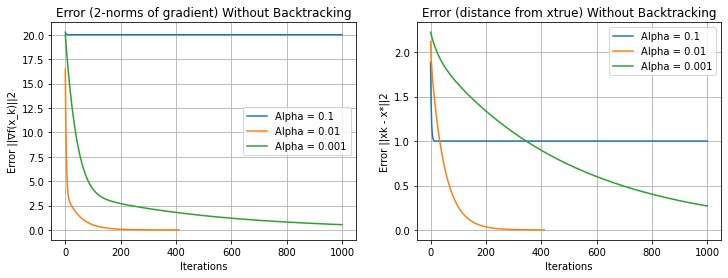


Iteration: 80, Solution: [1.         1.99990644], Error: 4.18422348494792e-05


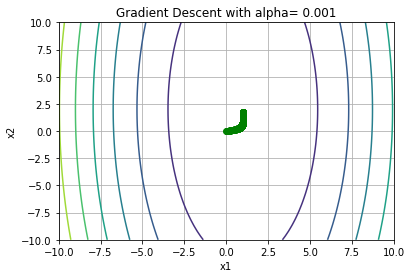

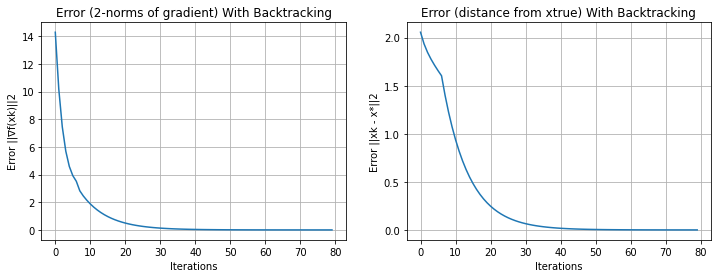

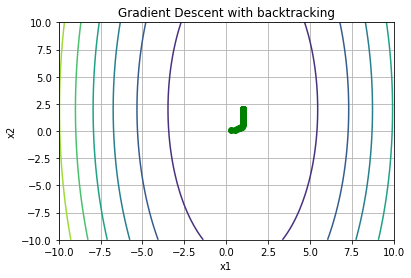

In [5]:
#FUNCTION 2 
"""NON VIENE!!!"""
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (10*(x1 - 1)**2 + (x2 - 2)**2)
def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*(x1 - 1), 2*(x2 - 2)])

x0 = np.array([0, 0])
kmax = 1000 #try 100 and 1000
tolf = tolx = 1e-5
x_true = np.array([1, 2])

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with alpha= " + str(alpha))

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with backtracking")

n = 1
Alpha: 0.1, Iteration: 89, Solution: [0.99991536], Error: 8.46414978287191e-05
Alpha: 0.01, Iteration: 689, Solution: [0.99901678], Error: 0.0009832163179611664
Alpha: 0.001, Iteration: 1001, Solution: [0.63267227], Error: 0.36732772934619295


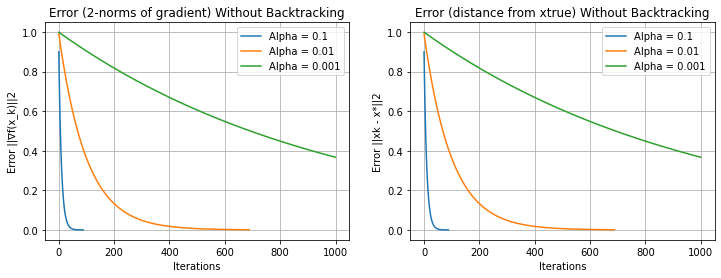


Iteration: 37, Solution: [0.99997616], Error: 2.3837831494288864e-05


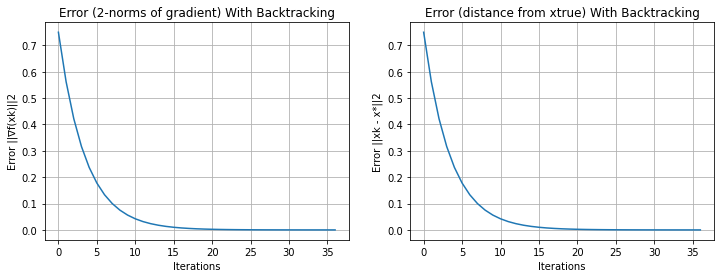

In [6]:
# FUNCTION 3

print("n = 1")
n = 1 
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true

def f(x):
    return 1/2*(np.linalg.norm(A @ x - b, 2)**2)

def grad_f(x): #AT(Ax−b)
    residual = (A @ x) - b
    gradient = A.T @ residual
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n = 5
Alpha: 0.1, Iteration: 406, Solution: [0.99984913 0.9975983  1.00669328 1.00182481 0.99372299], Error: 0.004320226047809489
Alpha: 0.01, Iteration: 1001, Solution: [0.99188101 1.02744005 1.01228024 0.99125365 0.97237114], Error: 0.01902383321096744
Alpha: 0.001, Iteration: 1001, Solution: [1.08433987 1.04313897 0.96678904 0.91274276 0.87432296], Error: 0.08183605255252964


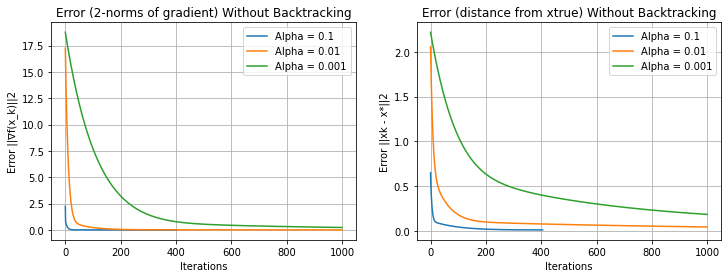


Iteration: 220, Solution: [0.99986644 0.99754739 1.00668386 1.00184486 0.99376336], Error: 0.0043129159261066285


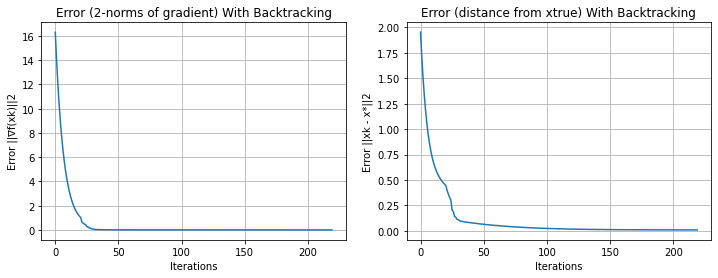

In [7]:
# FUNCTION 3

print("n = 5")
n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true

def f(x):
    return 1/2*(np.linalg.norm(A @ x - b, 2)**2)

def grad_f(x): #AT(Ax−b)
    residual = (A @ x) - b
    gradient = A.T @ residual
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n=1
l = 0.3960489142401833
Alpha: 0.1, Iteration: 63, Solution: [0.71625219], Error: 0.28374780990016824
Alpha: 0.01, Iteration: 493, Solution: [0.71560744], Error: 0.28439255902725546
Alpha: 0.001, Iteration: 1001, Solution: [0.539389], Error: 0.46061099729104293


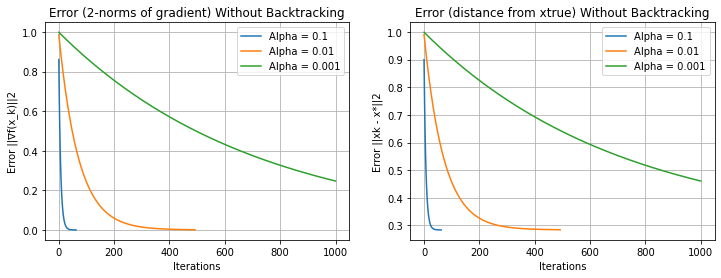


Iteration: 25, Solution: [0.71629163], Error: 0.2837083669680749


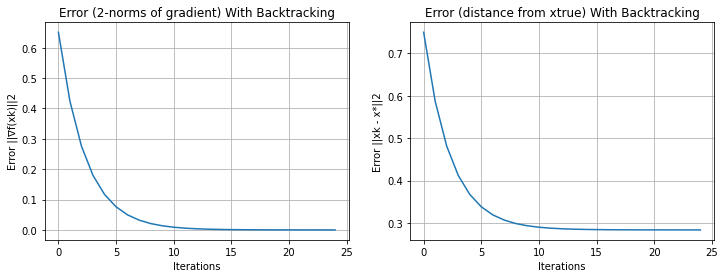

In [8]:
#FUNCTION 4
import random

print("n=1")
n = 1
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true
l = random.random() #fixed values between [0, 1] 
print(f"l = {l}")

def f(x):
    return 0.5*np.linalg.norm(A @ x - b, 2)**2 + l/2*np.linalg.norm(x, 2)**2

def grad_f(x): #AT(Ax-b)
    residual = (A @ x) - b
    gradient = A.T @ residual + l * x
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n=5
l = 0.6664817967031998
Alpha: 0.1, Iteration: 52, Solution: [1.02618347 0.96253872 0.89089276 0.84108724 0.80593611], Error: 0.12402207075132923
Alpha: 0.01, Iteration: 342, Solution: [1.02618345 0.96312507 0.89091454 0.84076176 0.80538875], Error: 0.1242379383457607
Alpha: 0.001, Iteration: 1001, Solution: [1.06225033 0.95657087 0.87267182 0.81714871 0.77895991], Error: 0.1444070457864067


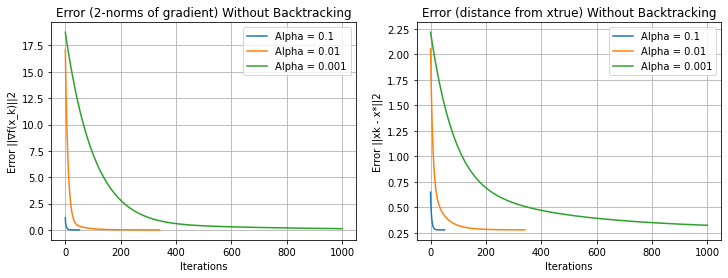


Iteration: 71, Solution: [1.02618279 0.96253948 0.89089314 0.84108732 0.80593599], Error: 0.12402194463969196


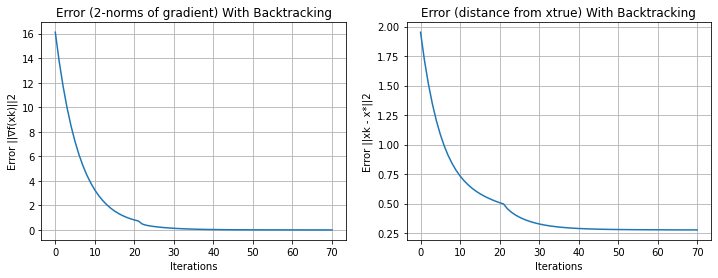

In [9]:
#FUNCTION 4
import random

print("n=5")
n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true
l = random.random() #fixed values between [0, 1] 
print(f"l = {l}")

def f(x):
    return 0.5*np.linalg.norm(A @ x - b, 2)**2 + l/2*np.linalg.norm(x, 2)**2

def grad_f(x): #AT(Ax-b)
    residual = (A @ x) - b
    gradient = A.T @ residual + l * x
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

In [10]:
def my_plot_2D(xk_vals, k, f_vals, grad_valks, err_vals, f, title):
    x_vals = np.linspace(-3, 3, 100)
    y_vals = []
    for x in x_vals:
        y_vals.append(f(x))
    plt.plot(x_vals, y_vals)
    plt.scatter(xk_vals, f_vals, c='green')
    plt.title(title)

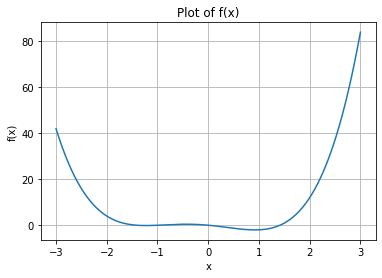

Alpha: 0.1, x0: -1, Iteration: 11, Solution: -1.2322368229753748
Alpha: 0.01, x0: -1, Iteration: 113, Solution: -1.2321078834970505
Alpha: 0.001, x0: -1, Iteration: 811, Solution: -1.2307850520802697


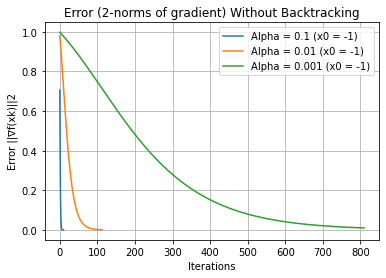

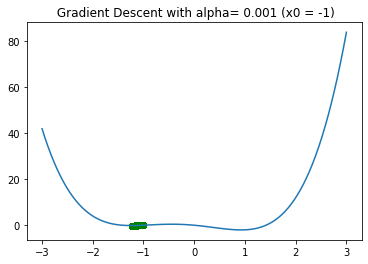


Iteration: 54, Solution: -1.2321590180202115


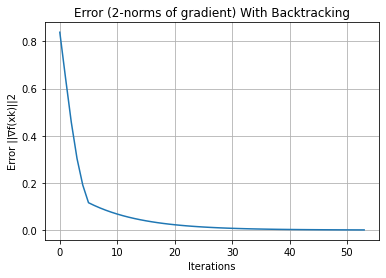

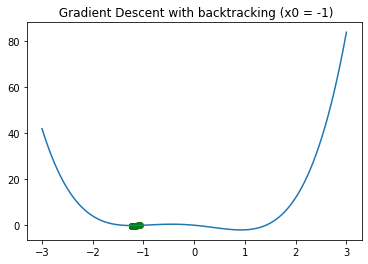

Alpha: 0.1, x0: 0, Iteration: 9, Solution: 0.9222263966908124
Alpha: 0.01, x0: 0, Iteration: 95, Solution: 0.9221561972760987
Alpha: 0.001, x0: 0, Iteration: 774, Solution: 0.9213887683969288


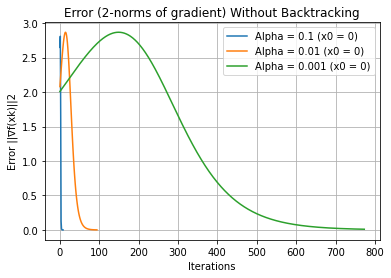

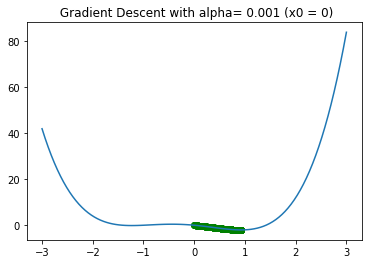


Iteration: 47, Solution: 0.9221833168070763


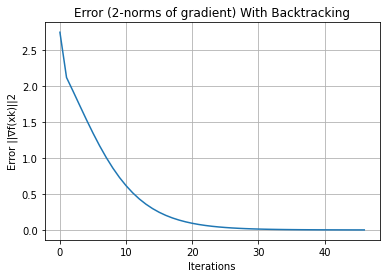

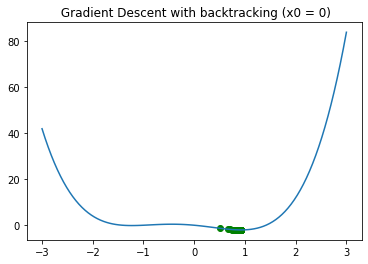

In [11]:
# FUNCTION 5

def GD(f, grad_f, x0, alpha, kmax, tolf, tolx):
    xold = x0
    k=0
    conditions = True

    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    err_values = []  # Store ||grad_f(x_k)||_2 values
    
    while conditions:
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        err_values.append(np.abs(grad_f(x)))
        
        condition1 = np.abs(grad_f(x)) > tolf*np.abs(grad_f(x0))
        condition2 =  np.abs(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 & condition2 & condition3
        
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, err_values
    
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.abs(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            print("alpha too small")
            break
    return alpha

def GD_backtracking(f, grad_f, x0, kmax, tolf, tolx):
    xold = x0
    k = 0
    conditions = True
    
    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    err_values = []  # Store ||grad_f(x_k)||_2 values
    
    while conditions:
        alpha = backtracking(f, grad_f, xold)
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        err_values.append(np.abs(grad_f(x)))
        
        condition1 = np.abs(grad_f(x)) > tolf*np.abs(grad_f(x0))
        condition2 =  np.abs(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 and condition2 and condition3
        
        k += 1
        xold = x
    return x_values, k, f_values, grad_values, err_values
    
def f(x):
    return x**4+x**3-2*x**2-2*x # Non convex function

x = np.linspace(-3, 3, 200)
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
plt.show()

def grad_f(x):
    return 4*(x**3)+3*(x**2)-4*x-2

kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

for x0 in [-1, 0]:
    #Without backtracking
    for alpha in [0.1, 0.01, 0.001]:
        x_sol_values, k, f_values, grad_values, err_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx)
        print(f"Alpha: {alpha}, x0: {x0}, Iteration: {k}, Solution: {x_sol_values[-1]}")
        plt.plot(range(k), err_values, label=f"Alpha = {alpha} (x0 = {x0})")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(xk)||2")
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.legend()
    plt.grid(True)
    
    plt.show()

    my_plot_2D(x_sol_values, k, f_values, grad_values, err_values, f, " Gradient Descent with alpha= " + str(alpha) + " (x0 = " + str(x0) + ")")
    plt.show()
    
    #With backtracking
    x_sol_values, k, f_values, grad_values, err_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx)
    print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}")
    
    plt.plot(range(k), err_values)
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(xk)||2")
    plt.title("Error (2-norms of gradient) With Backtracking")
    plt.grid(True)

    plt.show()

    my_plot_2D(x_sol_values, k, f_values, grad_values, err_values, f, " Gradient Descent with backtracking (x0 = " + str(x0) + ")")
    plt.show()